In [ ]:
import pickle
from routing_problem import RoutingProblem, RoutingSolution
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Construct an array
def get_statistics(solver: str):

    scores = []
    variables = []
    constraints = []
    biases = []
    times = []

    for m in range(1, 7):

        s, v, c, b, t = [], [], [], [], []

        for i in range(3):
            instance_str = f'vrp_{m}m_{5*m}n_{60}c_v{i}'

            with open(f'results/{solver}/{instance_str}.pkl', 'rb') as file:
                results = pickle.load(file)

            v.append(results.num_variables)
            c.append(results.num_constraints)
            b.append(results.num_biases)
            s.append(results.samples.lowest().first.energy)
            t.append(results.time)

        scores.append(s)
        variables.append(v)
        biases.append(b)
        times.append(t)
        constraints.append(c)

    return scores, variables, biases, times, constraints

In [26]:
dscores, dvariables, dbiases, dtimes, dconstraints = get_statistics('default')
bscores, bvariables, bbiases, btimes, bconstraints = get_statistics('bounded_path')

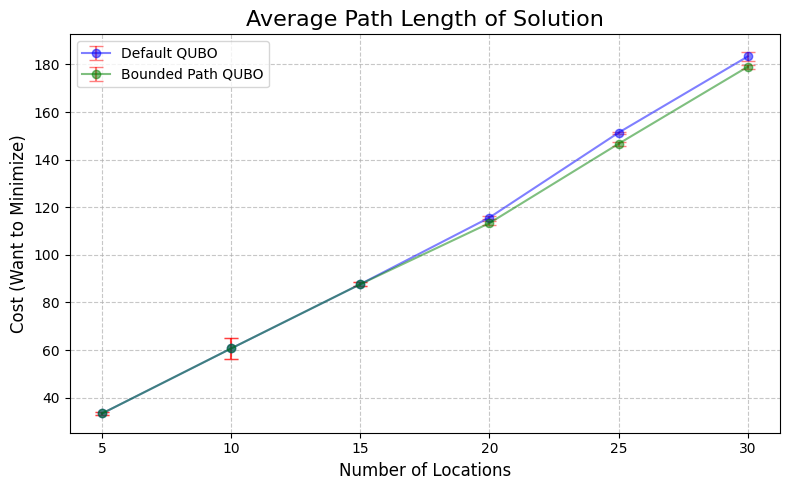

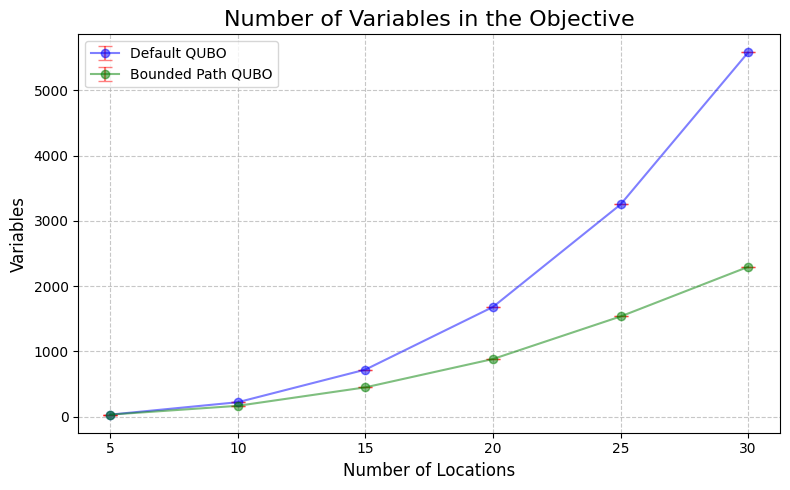

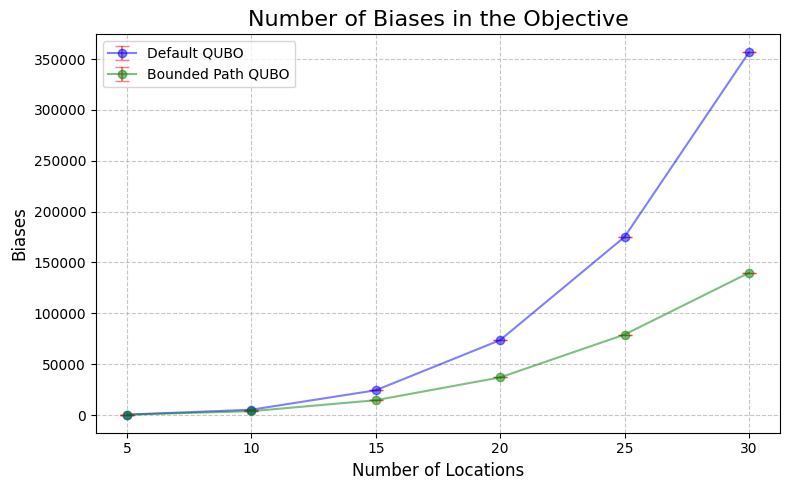

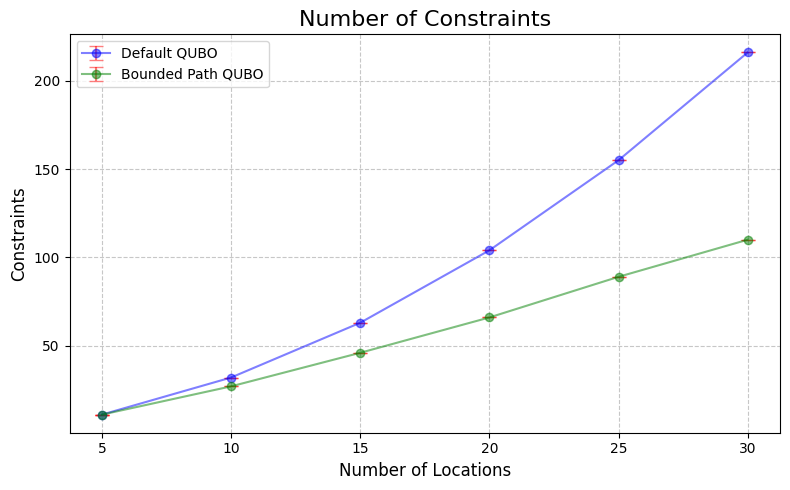

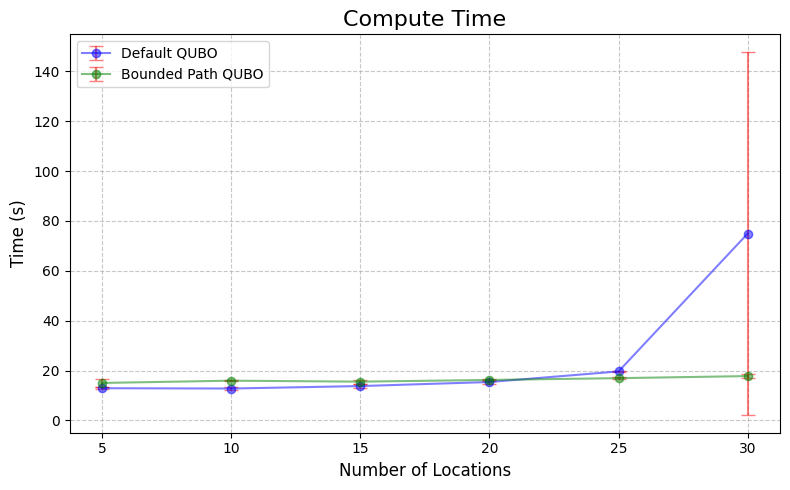

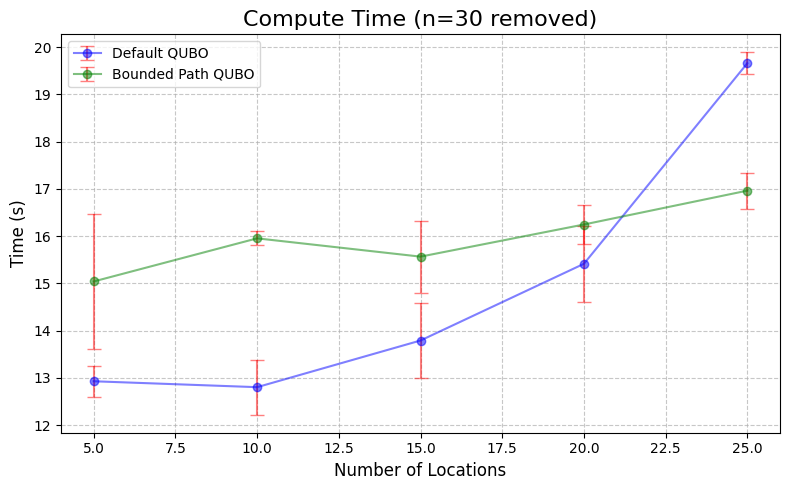

In [50]:
def graph_vals(ys, labels, title, xlabel, ylabel):
    # Input data: 2D array of y-values for each x

    x = [(i+1)*5 for i in range(len(ys[0]))]

    colors = ['blue', 'green', 'pink']

    y_means = []
    y_stds = []

    # Calculate means and standard deviations
    for y in ys:
        y = np.array(y)
        y_means.append(np.mean(y, axis=1))
        y_stds.append(np.std(y, axis=1))


    # Create the plot
    plt.figure(figsize=(8, 5))
    for i in range(len(ys)):
        plt.errorbar(x, y_means[i], yerr=y_stds[i], fmt='-o', label=labels[i], color=colors[i], ecolor='red', capsize=5, alpha=0.5)

    # Add titles and labels
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Add grid and legend
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

solvers = ['Default QUBO', 'Bounded Path QUBO']
graph_vals(ys=[dscores, bscores], labels = solvers, title = "Average Path Length of Solution", xlabel="Number of Locations", ylabel="Cost (Want to Minimize)")
graph_vals(ys=[dvariables, bvariables], labels=solvers, title="Number of Variables in the Objective", xlabel="Number of Locations", ylabel="Variables")
graph_vals(ys=[dbiases, bbiases], labels=solvers, title="Number of Biases in the Objective", xlabel="Number of Locations", ylabel="Biases")
graph_vals(ys=[dconstraints, bconstraints], labels=solvers, title="Number of Constraints", xlabel="Number of Locations", ylabel="Constraints")
graph_vals(ys=[dtimes, btimes], labels=solvers, title="Compute Time", xlabel="Number of Locations", ylabel="Time (s)")
graph_vals(ys=[dtimes[:5], btimes[:5]], labels=solvers, title="Compute Time (n=30 removed)", xlabel="Number of Locations", ylabel="Time (s)")